In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
# Loading the dataset
df = pd.read_csv("prices.csv")
df.head(5)

,Area,Bedroom,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [161]:
# Filling missing values in 'Bedroom' column with the median value
import math
median_bedroom= math.floor(df.Bedroom.median())

df.Bedroom= df.Bedroom.fillna(median_bedroom)
df.tail(5)

,Area,Bedroom,Age,Price
46,4450,3.0,9,710000
47,4550,4.0,7,740000
48,4650,5.0,6,770000
49,4750,4.0,8,790000
50,4850,5.0,3,820000


In [ ]:
# Preparing data for training and testing
X= df[["Age","Bedroom","Area"]]
y= df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Training the Linear Regression model
reg= linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X)


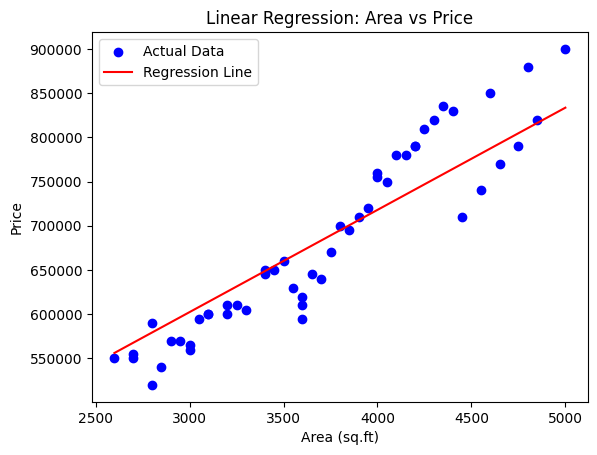

In [ ]:
# Plotting the regression line for 'Area' vs 'Price'
area_range = np.linspace(df['Area'].min(), df['Area'].max(), 100)

X_line = pd.DataFrame({
    'Age': [df['Age'].mean()]*100,
    'Bedroom': [df['Bedroom'].mean()]*100,
    'Area': area_range
})

y_line = reg.predict(X_line)
 

plt.scatter(df['Area'], df['Price'], color='blue', label='Actual Data')
plt.plot(area_range, y_line, color='red', label='Regression Line')
plt.xlabel('Area (sq.ft)')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.show()

In [ ]:
reg.coef_ # Coefficients for Age, Bedroom, Area

array([-4250.59924967,  1102.25494535,   115.57863925])

In [ ]:
reg.intercept_  # Intercept of the regression line

np.float64(302957.3342616454)

In [ ]:
#Predicting the price of a house with 24 years old, 3 bedrooms and 2500 sq.ft area
price= np.round(reg.predict([[24,3,2500]]))
price

c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([493196.])

Step-by-step calculation

Age contribution: -4250.60 * 24 = -102014.4

Bedroom contribution: 1102.25 * 3 = 3306.75

Area contribution: 115.58 * 2500 = 288950

302957.33 - 102014.4 + 3306.75 + 288950 ≈  493,200

In [ ]:
# Predicting the price of a house with 10 years old, 2 bedrooms and 1500 sq.ft area
price= np.round(reg.predict([[10,2,1500]]))
price

c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([436024.])

Step-by-step:

Age contribution: -4250.60 * 10 = -42506

Bedroom contribution: 1102.25 * 2 = 2204.5

Area contribution: 115.58 * 1500 = 173370

302957.33 - 42506 + 2204.5 + 173370 ≈ 436025.83

In [ ]:
# Predicting the price of a house with 35 years old, 4 bedrooms and 2500 sq.ft area
price= np.round(reg.predict([[35,4,2500]]))
price

c:\Users\mayan\.conda\envs\tf2_19\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([447542.])

Step-by-step calculation:

Age contribution: -4250.60 * 35 = -148771

Bedroom contribution: 1102.25 * 4 = 4409

Area contribution: 115.58 * 2500 = 288950

302957.33 - 148771 + 4409 +  288950 ≈ 447545

In [ ]:
# Evaluating the model
y_test_pred = reg.predict(X_test)

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 23647.02
MSE: 924830630.93
R²: 0.91
